In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime


In [2]:
def collect_data(path,filename):
    data=pd.read_csv(path+'/'+filename)
    return data

In [3]:
path='C:/Users/DELL/Desktop/Data'
filename='googleplaystore.csv'
data=collect_data(path,filename)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
def get_stats(data1):
    print(data1.info())
    print('\n')
    print('Shape of dataframe is {}'.format(data1.shape))
    print('\n')
    print('Missing values are')
    print(data1.isnull().sum())
    print('\n')
    print('Data type of features are:')
    print(data1.dtypes)

In [5]:
get_stats(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of dataframe is (10841, 13)


Missing values are
App                  0
Category             0
Rating            1474
Reviews              0
Size     

In [6]:
data['Last Updated']=pd.to_datetime(data['Last Updated'],errors='coerce')  

In [7]:
data['Year']=data['Last Updated'].dt.year
data['Month']=data['Last Updated'].dt.month


In [8]:
data['Type'].isna().sum()

1

In [9]:
data.dropna(subset=['Type'],inplace=True)

In [10]:
data['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [11]:
data['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [12]:
lables=data['Type'].value_counts().index
values=data['Type'].value_counts().values


In [13]:
import plotly.express as px

In [14]:
px.pie(names=lables,values=values)

In [15]:
df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']


In [16]:
free=df1['Year'].value_counts().reset_index()

In [17]:
free.columns=['year','count']
free

,year,count
0,2018.0,7003
1,2017.0,1684
2,2016.0,710
3,2015.0,377
4,2014.0,150
5,2013.0,81
6,2012.0,21
7,2011.0,12
8,2010.0,1


In [18]:
paid=df2['Year'].value_counts().reset_index()
paid.columns=['year','count']
paid

,year,count
0,2018.0,345
1,2017.0,183
2,2016.0,94
3,2015.0,82
4,2014.0,59
5,2013.0,29
6,2012.0,5
7,2011.0,3


In [19]:
row={'year':2010,'count':0}
paid.append(row,ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\3862156374.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,year,count
0,2018.0,345
1,2017.0,183
2,2016.0,94
3,2015.0,82
4,2014.0,59
5,2013.0,29
6,2012.0,5
7,2011.0,3
8,2010.0,0


In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [21]:
trace1=go.Scatter(x=free['year'],y=free['count'])
trace2=go.Scatter(x=paid['year'],y=paid['count'])
y=[trace1,trace2]


In [22]:
fig=go.Figure(data=y)
fig.show()

In [23]:
def stats(dataframe,feature,column1,column2):
    df=dataframe[feature].value_counts().reset_index()
    df.columns=[column1,column2]
    return df

In [24]:
stats(df1,'Year','year','count')

,year,count
0,2018.0,7003
1,2017.0,1684
2,2016.0,710
3,2015.0,377
4,2014.0,150
5,2013.0,81
6,2012.0,21
7,2011.0,12
8,2010.0,1


In [25]:
stats(df2,'Year','year','count')


,year,count
0,2018.0,345
1,2017.0,183
2,2016.0,94
3,2015.0,82
4,2014.0,59
5,2013.0,29
6,2012.0,5
7,2011.0,3


In [26]:
def need_visualisation(df1=None,df2=None,column1=None,column2=None,dict_title=None,visual='scatter'):
    if visual=='scatter':
        trace1=go.Scatter(x=df1[column1],y=df1[column2])
        trace2=go.Scatter(x=df2[column1],y=df2[column2])
        y=[trace1,trace2]
        layout=dict_title
        fig=go.Figure(data=y,layout=layout)
        return plot(fig)
    elif visual=='bar':
        return px.bar(df1,x=column1,y=column2)



In [27]:
free=stats(df1,'Year','year','count')
paid=stats(df2,'Year','year','count')
paid 

,year,count
0,2018.0,345
1,2017.0,183
2,2016.0,94
3,2015.0,82
4,2014.0,59
5,2013.0,29
6,2012.0,5
7,2011.0,3


In [28]:
row={'year':2010,'count':0}
paid.append(row,ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\3862156374.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,year,count
0,2018.0,345
1,2017.0,183
2,2016.0,94
3,2015.0,82
4,2014.0,59
5,2013.0,29
6,2012.0,5
7,2011.0,3
8,2010.0,0


In [29]:
need_visualisation(free,paid,'year','count',dict_title={'title':'app updatred or added even the year'})

'temp-plot.html'

In [30]:
output=stats(df1,'Month','month','count')
output

,month,count
0,7.0,3022
1,8.0,1511
2,6.0,1179
3,5.0,897
4,3.0,595
5,4.0,553
6,2.0,488
7,1.0,444
8,12.0,363
9,10.0,357


In [31]:
need_visualisation(df1=output,column1='month',column2='count',visual='bar')

In [32]:
output2=stats(df2,'Month','month','count')
output2

,month,count
0,7.0,141
1,6.0,93
2,8.0,83
3,5.0,81
4,3.0,72
5,4.0,63
6,12.0,63
7,1.0,47
8,2.0,45
9,10.0,41


In [33]:
need_visualisation(df1=output2,column1='month',column2='count',visual='bar')

In [34]:
df1.groupby('Month')['Month'].count()

Month
1.0      444
2.0      488
3.0      595
4.0      553
5.0      897
6.0     1179
7.0     3022
8.0     1511
9.0      283
10.0     357
11.0     347
12.0     363
Name: Month, dtype: int64

In [35]:
df1.groupby('Month').agg({'Month':'count'})

,Month
Month,
1.0,444
2.0,488
3.0,595
4.0,553
5.0,897
6.0,1179
7.0,3022
8.0,1511
9.0,283


In [36]:
need4=stats(df2,'Content Rating','users','count')

In [37]:
need3=stats(df1,'Content Rating','users','count')

In [38]:
need_visualisation(need3,need4,column1='users',column2='count')

'temp-plot.html'

In [39]:
df1['Rating'].dtype

dtype('float64')

In [40]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [41]:
df1['Rating'].isna().sum()

1320

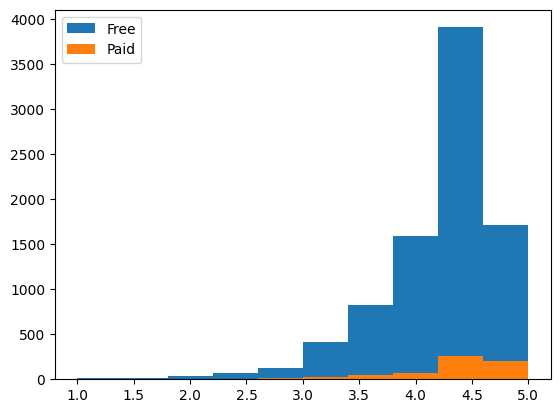

In [42]:
plt.hist(df1['Rating'].dropna(),label='Free')
plt.hist(df2['Rating'].dropna(),label='Paid')
plt.legend()

In [43]:
stats(df1,'Rating','rating','count')

,rating,count
0,4.4,1031
1,4.3,1025
2,4.5,965
3,4.2,890
4,4.6,741
5,4.1,676
6,4.0,546
7,4.7,446
8,3.9,370
9,3.8,282


In [44]:
stats(df2,'Rating','rating','count')

,rating,count
0,4.6,82
1,4.4,78
2,4.5,73
3,4.2,62
4,4.7,53
5,4.3,51
6,4.8,39
7,4.1,32
8,5.0,28
9,4.0,22


In [45]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year', 'Month'],
      dtype='object')

In [46]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
free_categories=stats(df1,'Category','category','count').sort_values(by='category')
free_categories

,category,count
29,ART_AND_DESIGN,62
26,AUTO_AND_VEHICLES,82
32,BEAUTY,53
18,BOOKS_AND_REFERENCE,203
3,BUSINESS,446
30,COMICS,60
6,COMMUNICATION,360
17,DATING,227
20,EDUCATION,152
21,ENTERTAINMENT,147


In [48]:
paid_categories=stats(df2,'Category','category','count').sort_values(by='category')
paid_categories

,category,count
22,ART_AND_DESIGN,3
20,AUTO_AND_VEHICLES,3
6,BOOKS_AND_REFERENCE,28
13,BUSINESS,14
7,COMMUNICATION,27
16,DATING,7
18,EDUCATION,4
24,ENTERTAINMENT,2
29,EVENTS,1
0,FAMILY,191


In [49]:
need_visualisation(free_categories,paid_categories,'category','count')

'temp-plot.html'

In [50]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year', 'Month'],
      dtype='object')

In [51]:
free_android=stats(df1,'Android Ver','Android Version','Total_apps').sort_values(by='Android Version')

In [52]:
paid_android=stats(df2,'Android Ver','Android Version','Total_apps').sort_values(by='Android Version')


In [53]:
need_visualisation(free_android,paid_android,'Android Version','Total_apps')

'temp-plot.html'

In [54]:
df1['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10039, dtype: object

In [55]:
installs_free=stats(df1,'Installs','installs','count').sort_values(by='installs')
installs_paid=stats(df2,'Installs','installs','count').sort_values(by='installs')


In [56]:
need_visualisation(installs_free,installs_paid,'installs','count')

'temp-plot.html'

In [57]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [58]:
data['Price'][10472]='0'

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\141292357.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [60]:
def remove_dollar(x):
    if x=='0':
        return 0
    else :
        return x[1:]

In [61]:
dataframe=data.copy()
dataframe['Price']=dataframe['Price'].apply(remove_dollar)

In [62]:
dataframe['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [63]:
dataframe['Price']=dataframe['Price'].astype(float)

In [64]:
dataframe['Price'].unique()


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [65]:
dataframe['Rating'].dtypes

dtype('float64')

In [66]:
dataframe['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [67]:
dataframe['Rating']=dataframe['Rating'].astype(float)

In [68]:
dataframe['Rating'].dtypes

dtype('float64')

In [69]:
def conv_into_float(feature,df):
    print('Before manipulation ,Data type of {} was {}'.format(feature,df[feature].dtype))
    df[feature]=df[feature].astype(float)
    print('After manipulation ,Data type of {} is {}'.format(feature,df[feature].dtype))


In [70]:
dataframe['Reviews'].replace('3.0M',3000000000,inplace=True)

In [71]:
conv_into_float('Reviews',dataframe)

Before manipulation ,Data type of Reviews was object
After manipulation ,Data type of Reviews is float64


In [72]:
dataframe['Installs'].dtypes


dtype('O')

In [73]:
dataframe['Installs']=dataframe['Installs'].replace('Free','100+')
dataframe['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [74]:
def clean_inst(x):
    x=x.replace(',','')
    return int(x.replace('+',''))


In [75]:
dataframe['Installs']=dataframe['Installs'].apply(clean_inst)

In [76]:
dataframe['Installs'].dtypes

dtype('int64')

In [77]:
dataframe['Size'].dtypes

dtype('O')

In [78]:
dataframe['Size'].value_counts()


Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [79]:
def convert_into_mb(x):
    if 'M' in x:
        return float(x[0:-1])
    elif 'K' in x:
        mb=float(x[0:-1])/1024
        return np.round(mb,2)
    
    else:
        return float(1000/1024)

In [80]:
filter=dataframe['Size']=='Varies with device'
data3=dataframe[-filter]

In [81]:
data3['Size']=data3['Size'].apply(convert_into_mb)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\3483477976.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
data3['Size'].dtype

dtype('float64')

In [83]:
dataframe['Size'].replace('Varies with device','13M',inplace=True)

In [84]:
dataframe['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [85]:
dataframe['Size']=dataframe['Size'].apply(convert_into_mb)

In [86]:
dataframe['Size'].dtype

dtype('float64')

In [87]:
dataframe.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
Year                 1
Month                1
dtype: int64

In [88]:
fe=dataframe.dropna()

In [89]:
fe.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
Month             0
dtype: int64

In [90]:
ind_feature=['Reviews','Size','Installs','Price']
fe[ind_feature]

,Reviews,Size,Installs,Price
0,159.0,19.0,10000,0.0
1,967.0,14.0,500000,0.0
2,87510.0,8.7,5000000,0.0
3,215644.0,25.0,50000000,0.0
4,967.0,2.8,100000,0.0
...,...,...,...,...
10834,7.0,2.6,500,0.0
10836,38.0,53.0,5000,0.0
10837,4.0,3.6,100,0.0
10839,114.0,13.0,1000,0.0


In [91]:
fe['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [92]:
x=fe[ind_feature]

In [93]:
y=fe['Rating']

In [94]:
x.shape

(9360, 4)

In [95]:
y.shape

(9360,)

In [96]:
from sklearn.feature_selection import SelectKBest,f_regression

In [97]:
x_new=SelectKBest(f_regression,k=3).fit_transform(x,y)

In [98]:
x_new

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       ...,
       [4.00000e+00, 3.60000e+00, 1.00000e+02],
       [1.14000e+02, 1.30000e+01, 1.00000e+03],
       [3.98307e+05, 1.90000e+01, 1.00000e+07]])

In [99]:
from scipy.stats.stats import pearsonr

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\4005289447.py:1: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



In [100]:
pearsonr(fe['Reviews'],fe['Rating'])

PearsonRResult(statistic=0.06813270883720679, pvalue=4.155367872052734e-11)

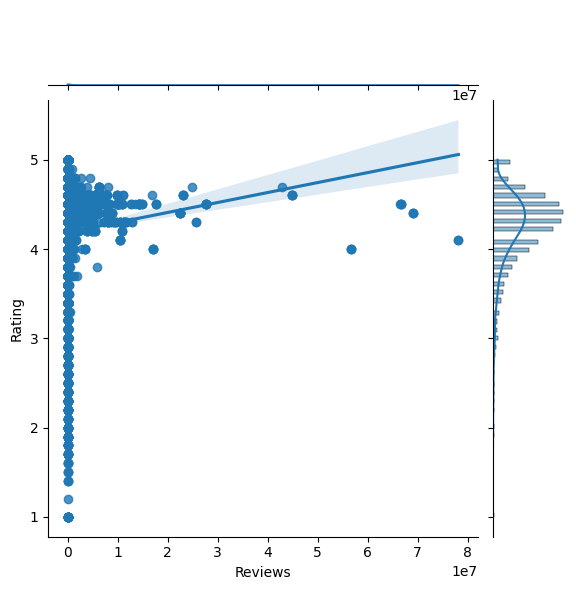

In [101]:
sns.jointplot(x=fe['Reviews'],y=fe['Rating'],kind='reg')


In [102]:
from scipy import stats

AttributeError: 'JointGrid' object has no attribute 'annotate'

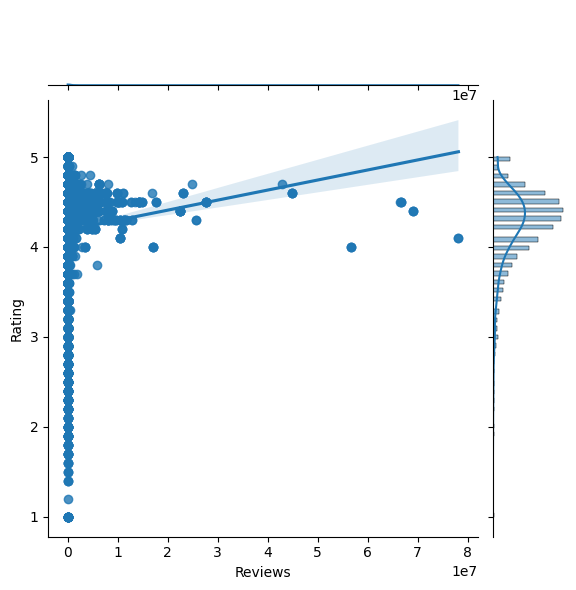

In [103]:
j=sns.jointplot(x=fe['Reviews'],y=fe['Rating'],kind='reg')
j.annotate(stats.pearsonr)

In [104]:
out_list=[]
for column in ind_feature:
    cor_list=pearsonr(fe[column],fe['Rating'])
    out_list.append([column,cor_list[0],cor_list[1]])

In [ ]:
out_list

[['Reviews', 0.06813270883720679, 4.155367872052734e-11],
 ['Size', 0.06560853073348746, 2.1056245740196721e-10],
 ['Installs', 0.05133692709156859, 6.719094655481812e-07],
 ['Price', -0.021919498334990586, 0.033953854445535225]]

In [105]:
corr_df=pd.DataFrame(out_list,columns=['Features','Co-relation','P-value'])
corr_df.sort_values(by='P-value')

,Features,Co-relation,P-value
0,Reviews,0.068133,4.155368e-11
1,Size,0.065609,2.105625e-10
2,Installs,0.051337,6.719095e-07
3,Price,-0.021919,3.395385e-02


In [ ]:
fe.corr().style.background_gradient(cmap='Reds')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3312\2578574665.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rating,Reviews,Size,Installs,Price,Year,Month
Rating,1.000000,0.068133,0.065609,0.051337,-0.021919,0.137871,0.017234
Reviews,0.068133,1.000000,0.100824,0.641605,-0.009824,0.078321,0.048959
Size,0.065609,0.100824,1.000000,0.040342,-0.021858,0.178599,0.031573
Installs,0.051337,0.641605,0.040342,1.000000,-0.011895,0.092689,0.060282
Price,-0.021919,-0.009824,-0.021858,-0.011895,1.000000,-0.003406,-0.001881
Year,0.137871,0.078321,0.178599,0.092689,-0.003406,1.000000,-0.171858
Month,0.017234,0.048959,0.031573,0.060282,-0.001881,-0.171858,1.000000


In [106]:
dataframe.drop('Price',axis=1,inplace=True)

In [107]:
dataframe.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2972\4279439629.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rating,Reviews,Size,Installs,Year,Month
Rating,1.000000,0.289834,0.060233,0.048652,0.137714,0.017254
Reviews,0.289834,1.000000,0.001750,0.063283,0.075546,0.045928
Size,0.060233,0.001750,1.000000,0.047602,0.180405,0.028502
Installs,0.048652,0.063283,0.047602,1.000000,0.089378,0.056445
Year,0.137714,0.075546,0.180405,0.089378,1.000000,-0.187301
Month,0.017254,0.045928,0.028502,0.056445,-0.187301,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_3312\333727897.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Size', ylabel='Density'>

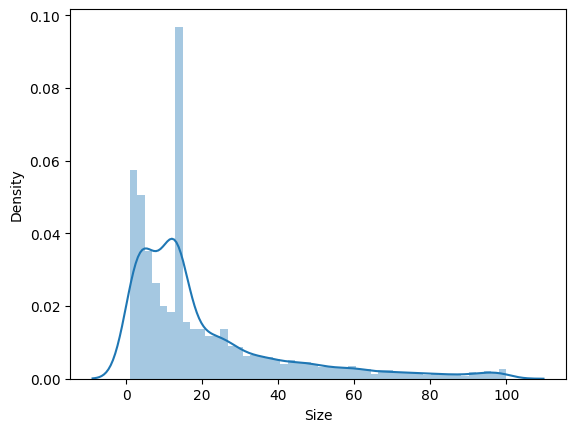

In [ ]:
sns.distplot(dataframe['Size'])

In [108]:
def remove_outlier(df,feature):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('Type'):
        m=np.mean(subdf[feature])
        s=np.std(subdf[feature])
        reduced_df=subdf[(subdf[feature]>(m-s))&(subdf[feature]<=(m+s))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [109]:
without_outliers=remove_outlier(dataframe,'Size')
without_outliers.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018.0,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018.0,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018.0,8.0


In [ ]:
dataframe.shape

(10840, 14)

In [ ]:
without_outliers.shape

(9319, 14)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3312\1384481540.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Size', ylabel='Density'>

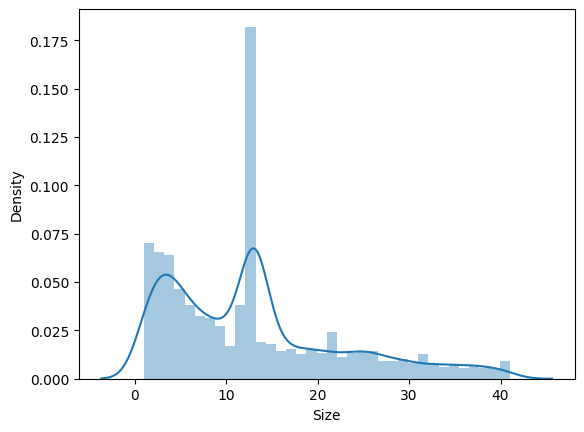

In [ ]:
sns.distplot(without_outliers['Size'])

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40'),
  Text(0, 45.0, '45')])

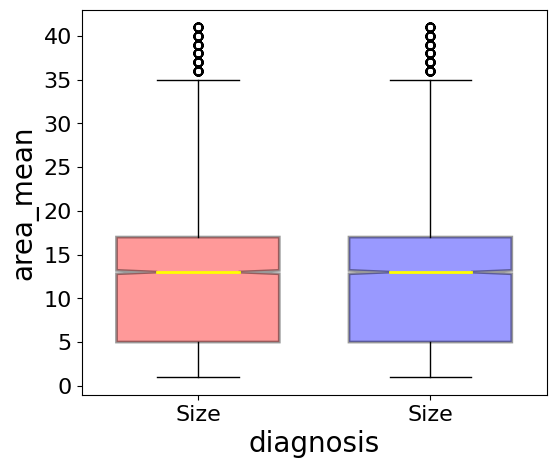

In [ ]:
malignant=without_outliers['Size']
benign=without_outliers['Size']
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([malignant,benign],
           notch = True,
           labels=['Size', 'Size'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          )

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('diagnosis', fontsize = 20)
plt.ylabel('area_mean', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3312\1049181723.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Installs', ylabel='Density'>

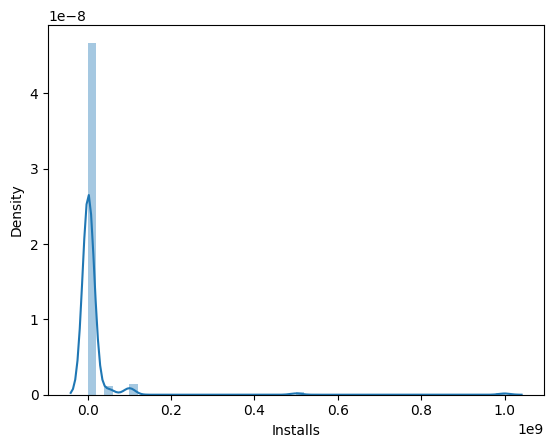

In [ ]:
sns.distplot(without_outliers['Installs'])

<AxesSubplot: >

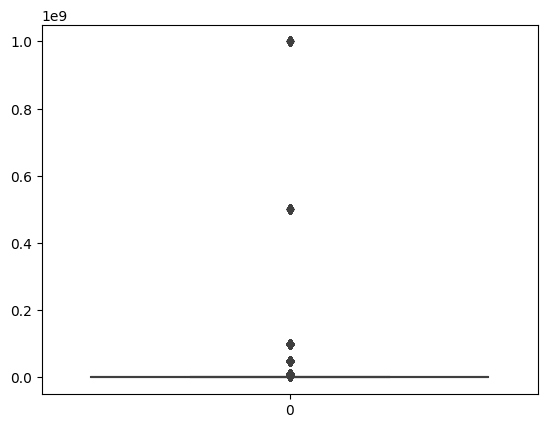

In [ ]:
sns.boxplot(without_outliers['Installs'])

In [110]:
Q1=without_outliers['Installs'].quantile(0.25)
Q3=without_outliers['Installs'].quantile(0.75)



In [111]:
iqr=Q3-Q1
iqr

999000.0

In [112]:
lower_tail=Q1-1.5*iqr
upper_tail=Q3+1.5*iqr
print(upper_tail)
print(lower_tail)

2498500.0
-1497500.0


In [113]:
outliers=[]
for install in without_outliers['Installs']:
    if install>upper_tail or install<lower_tail:
        outliers.append(install)
    else:
        continue


In [ ]:
print(outliers)

[5000000, 50000000, 10000000, 5000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 100000000, 10000000, 100000000, 10000000, 10000000, 10000000, 10000000, 1000000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 10000000, 10000000, 50000000, 10000000, 5000000, 50000000, 5000000, 100000000, 10000000, 5000000, 50000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 5000000, 5000000, 10000000, 5000000, 50000000, 5000000, 5000000, 10000000, 10000000, 10000000, 5000000, 5000000, 5000000, 10000000, 10000000, 5000000, 10000000, 10000000, 5000000, 5000000, 5000000, 5000000, 10000000, 10000000, 50000000, 100000000, 5000000, 10000000, 5000000, 5000000, 5000000, 1000000000, 1000000000, 10000000, 1000000000, 100000000, 1000000000, 1000000000, 500000000, 5000000, 100000000, 100000000, 100000000, 500000000, 50000000, 5000000, 5000000, 100000000, 10000000, 10000000, 10000000, 10000000, 100000000, 10000000, 5000000, 10

In [ ]:
len(outliers)

2207

In [114]:
for install in without_outliers['Installs']:
    if install > upper_tail or install<lower_tail:
        without_outliers['Installs']=without_outliers['Installs'].replace(install,np.median(without_outliers['Installs']))
    else:
        continue

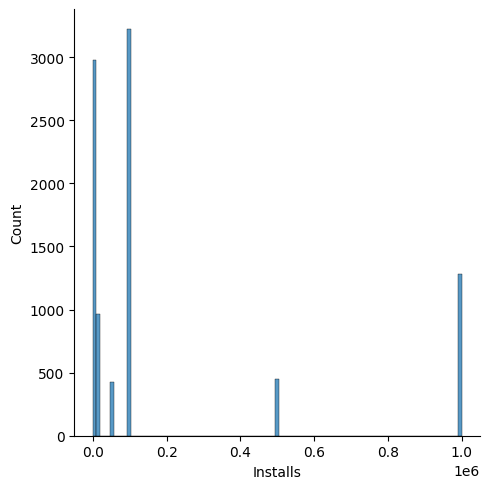

In [ ]:
sns.displot(without_outliers['Installs'])

<AxesSubplot: >

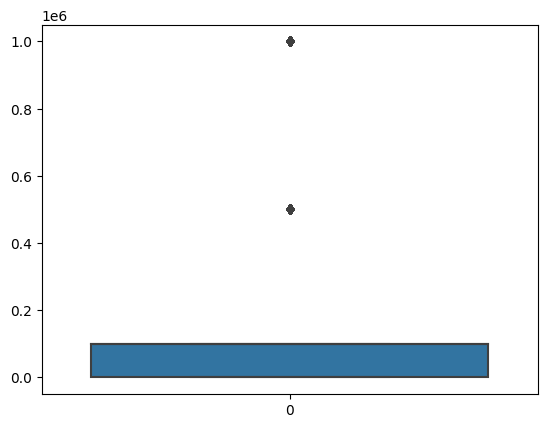

In [ ]:
sns.boxplot(without_outliers['Installs'])


In [115]:
without_outliers1=without_outliers.copy()

<AxesSubplot: >

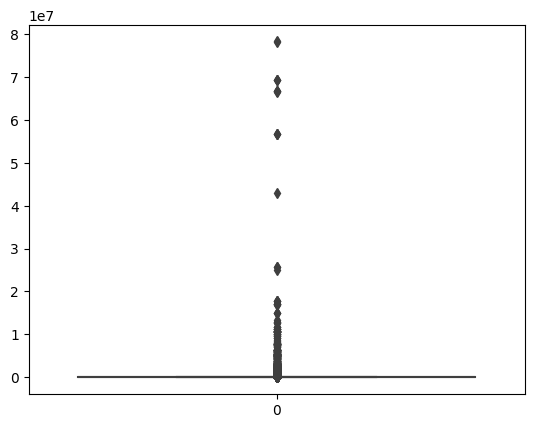

In [ ]:
sns.boxplot(without_outliers1['Reviews'])


In [ ]:
without_outliers1['Reviews'].max()

78158306.0

In [ ]:
without_outliers1['Reviews'].describe()

count    9.319000e+03
mean     3.492961e+05
std      2.737969e+06
min      0.000000e+00
25%      2.600000e+01
50%      1.195000e+03
75%      3.895900e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
without_outliers1['Reviews'].median()


1195.0

In [116]:
without_outliers1['Reviews']=np.where(without_outliers1['Reviews']>1e7,without_outliers1['Reviews'].median(),without_outliers1['Reviews'])

<AxesSubplot: >

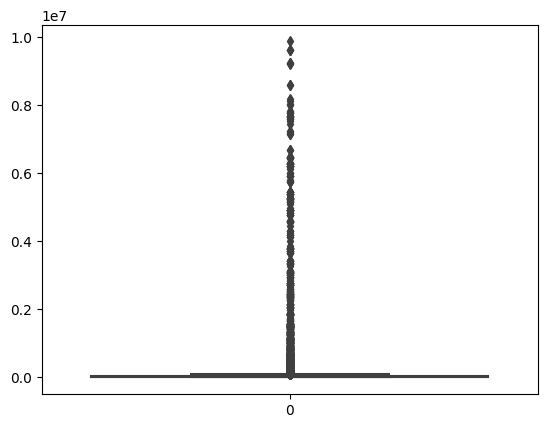

In [ ]:
sns.boxplot(without_outliers1['Reviews'])

In [117]:
without_outliers1['Reviews']=np.log1p(without_outliers1['Reviews'])

<AxesSubplot: >

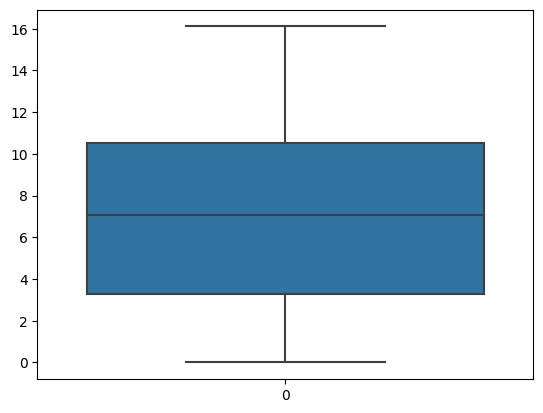

In [ ]:
sns.boxplot(without_outliers1['Reviews'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3312\3949810462.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Reviews', ylabel='Density'>

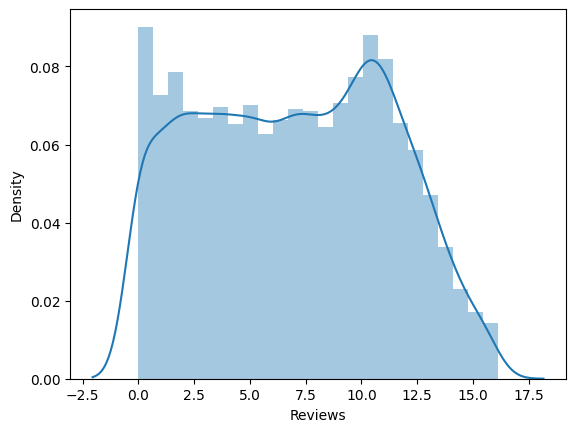

In [ ]:
sns.distplot(without_outliers1['Reviews'])

In [ ]:
without_outliers1['Rating'].isnull().sum()

1396

<AxesSubplot: xlabel='Content Rating', ylabel='Rating'>

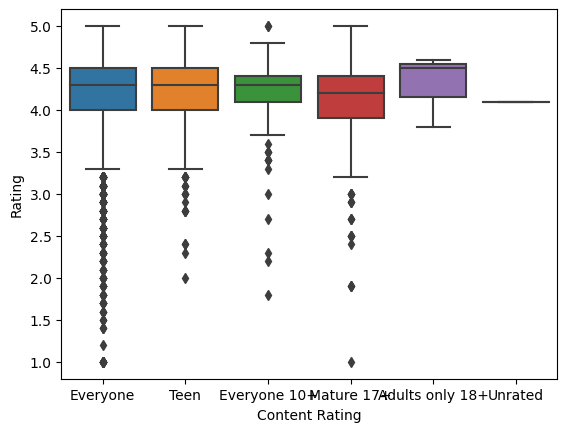

In [ ]:
sns.boxplot(x='Content Rating',y='Rating',data=without_outliers1)

In [118]:
without_outliers1.groupby('Content Rating')['Rating'].median()

Content Rating
Adults only 18+    4.5
Everyone           4.3
Everyone 10+       4.3
Mature 17+         4.2
Teen               4.3
Unrated            4.1
Name: Rating, dtype: float64

In [119]:
without_outliers1.groupby('Content Rating')['Rating'].mean()


Content Rating
Adults only 18+    4.300000
Everyone           4.179174
Everyone 10+       4.213910
Mature 17+         4.103448
Teen               4.212376
Unrated            4.100000
Name: Rating, dtype: float64

In [120]:
def impute_rating(cols):
    Rating=cols[0]
    Content_Rating=cols[1]
    if pd.isnull(Rating):
        if Content_Rating=='Adults only 18+':
            return 4.3
        elif Content_Rating=='Everyone':
            return 4.17   
        elif Content_Rating=='Everyone 10+':
            return 4.214
        elif Content_Rating=='Mature 17+':
            return 4.1
        elif Content_Rating=='Teen':
            return 4.212
        else:
            return 4.1
    else:
        return Rating

In [121]:
without_outliers1['Rating']=without_outliers1[['Rating','Content Rating']].apply(impute_rating,axis=1)

In [122]:
without_outliers1['Rating'].isnull().sum()

0

<AxesSubplot: >

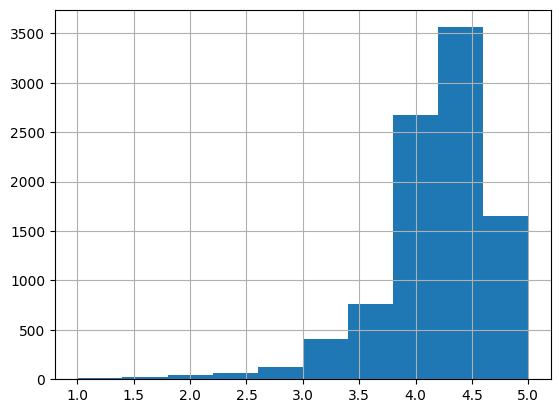

In [123]:
without_outliers1['Rating'].hist()

In [124]:
def convert(x):
    if x>0.0 and x<=1.5:
        return 1
    elif x >1.5 and  x<=2.5:
        return 2
    elif x>2.5 and x<=3.5:
        return 3
    elif x>3.5 and x<=4.5:
        return 4
    else:
        return 5

In [125]:
without_outliers1['Rating']=without_outliers1['Rating'].apply(convert)

In [127]:
encoding_data=without_outliers1.copy()

In [128]:
encoding_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year', 'Month'],
      dtype='object')

In [130]:
mean_ordinal=encoding_data.groupby('Category')['Rating'].mean().to_dict()

In [131]:
encoding_data['Category']=encoding_data['Category'].map(mean_ordinal)

In [132]:
encoding_data['Category']

0       4.307692
1       4.307692
2       4.307692
3       4.307692
4       4.307692
          ...   
9314    4.076294
9315    4.176471
9316    4.139752
9317    4.076294
9318    4.076294
Name: Category, Length: 9319, dtype: float64

In [136]:
encoding_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018.0,1.0


In [137]:
encoding_data['Content Rating'].nunique()

6

In [138]:
encoding_data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [141]:
ordinal_labels=encoding_data.groupby('Content Rating')['Rating'].mean().sort_values().index
ordinal_labels

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

In [144]:
dict_store={key:value for value,key in enumerate(ordinal_labels,0)}
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [147]:
encoding_data['Content Rating']=encoding_data['Content Rating'].map(dict_store)

In [148]:
encoding_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018.0,1.0
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018.0,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,Free,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018.0,8.0
3,Sketch - Draw & Paint,4.307692,4,12.281389,25.0,100000,Free,4,Art & Design,2018-06-08,Varies with device,4.2 and up,2018.0,6.0
4,Pixel Draw - Number Art Coloring Book,4.307692,4,6.875232,2.8,100000,Free,2,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018.0,6.0


In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
le=LabelEncoder()

In [152]:
encoding_data['Type']=le.fit_transform(encoding_data['Type'])

In [155]:
encoding_data['Type'].unique()

array([0, 1])

In [157]:
encoding_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018.0,1.0
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018.0,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,0,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018.0,8.0


In [160]:
encoding_data.drop(labels=['App','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [161]:
encoding_data.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Year,Month
0,4.307692,4,5.075174,19.0,10000,0,2,2018.0,1.0


In [162]:
encoding_data.dropna(inplace=True)

In [163]:
df3=encoding_data.copy()

In [164]:
df3.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
Year              0
Month             0
dtype: int64

In [168]:
x=df3.drop(['Rating'],axis=1)
y=df3['Rating']
x

,Category,Reviews,Size,Installs,Type,Content Rating,Year,Month
0,4.307692,5.075174,19.000000,10000,0,2,2018.0,1.0
1,4.307692,6.875232,14.000000,500000,0,2,2018.0,1.0
2,4.307692,11.379520,8.700000,100000,0,2,2018.0,8.0
3,4.307692,12.281389,25.000000,100000,0,4,2018.0,6.0
4,4.307692,6.875232,2.800000,100000,0,2,2018.0,6.0
...,...,...,...,...,...,...,...,...
9314,4.076294,2.890372,0.976562,100,1,1,2015.0,11.0
9315,4.176471,3.583519,2.400000,1000,1,2,2018.0,8.0
9316,4.139752,5.533389,11.000000,10000,1,4,2015.0,2.0
9317,4.076294,7.248504,9.500000,10000,1,2,2018.0,6.0


In [169]:
y

0       4
1       4
2       5
3       4
4       4
       ..
9314    4
9315    4
9316    4
9317    4
9318    4
Name: Rating, Length: 9319, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2)

In [172]:
len(X_train)

7455

In [174]:
len(X_test)

1864

In [173]:
len(df3)

9319

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
lr_c=LogisticRegression()

In [178]:
lr_c.fit(X_train,Y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [179]:
lre_predict=lr_c.predict(X_test)

In [180]:
lre_predict

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [181]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [183]:
lr_cm=confusion_matrix(Y_test,lre_predict)
lr_cm

array([[   0,    0,    0,    4,    0],
       [   0,    0,    0,   15,    0],
       [   0,    0,    0,  138,    0],
       [   0,    0,    0, 1377,    0],
       [   0,    0,    0,  330,    0]], dtype=int64)

In [184]:
accuracy_score(Y_test,lre_predict)

0.7387339055793991

In [185]:
def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    y_predict=model.predict(X_test)
    print('Predictions are:\n{}'.format(y_predict))
    print('\n')

    cm=confusion_matrix(Y_test,y_predict)
    print('Confusing matrix:\n{}'.format(cm))
    acc=accuracy_score(Y_test,y_predict)
    print('Accuracy Score is:\n{}'.format(acc))


In [188]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier())

Predictions are:
[4 4 4 ... 4 4 4]


Confusing matrix:
[[   0    0    0    4    0]
 [   0    1    0   12    2]
 [   0    0    7  126    5]
 [   0    1    6 1328   42]
 [   0    0    0  226  104]]
Accuracy Score is:
0.7725321888412017
